# 2.CTGAN模型训练

In [2]:
# 导入相关库包
import random
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from ctgan import CTGAN
from table_evaluator import TableEvaluator

IPython not installed.


In [3]:
# 设定可复现的随机种子
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

In [6]:
# 读取清洗后的数据集
data = pd.read_csv('data_clean.csv')
# 显示前5行数据
print(data.head())

   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  
0             0          202500.0    406597.5      24700.5         351000.0  
1             0          270000.0   1293502.5      35698.5        1129500.0  
2             0           67500.0    135000.0       6750.0         135000.0  
3             0          135000.0    312682.5      29686.5         297000.0  
4             0          121500.0    513000.0      21865.5         513000.0  


In [7]:
# 指定类别列，区分分类变量和连续变量
# 类别变量
categorical_features = [
    "TARGET",
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
]
# 连续变量
continuous_cols = ["AMT_INCOME_TOTAL", 
                   "AMT_CREDIT", 
                   "AMT_ANNUITY", 
                   "AMT_GOODS_PRICE"
]


## 第一次训练epochs=500

In [8]:
# 模型训练
# 注意：不要直接使用 100000 epoch，先用 300~500 观察效果
ctgan = CTGAN(verbose=True)

# fit 的调用方式：传入 DataFrame、离散列列表、以及训练轮次（这里示例用 500）
ctgan.fit(data, categorical_features, epochs=500)


Gen. (0.00) | Discrim. (0.00):   0%|                                                           | 0/500 [00:00<?, ?it/s]D:\anaconda3\envs\py10_torch271\lib\site-packages\torch\autograd\graph.py:824: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:181.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Gen. (-1.03) | Discrim. (0.09): 100%|████████████████████████████████████████████████| 500/500 [04:42<00:00,  1.77it/s]


In [9]:
# 生成合成样本
synthetic_data = ctgan.sample(10000)  # 从训练好的 CTGAN 模型中生成 10000 条合成数据

# 将生成的合成数据保存为 CSV 文件，方便后续分析或使用
synthetic_data.to_csv("data_synthetic.csv", index=False)  # index=False 表示不保存行索引

print("合成数据已保存为 data_synthetic.csv")

合成数据已保存为 data_synthetic.csv


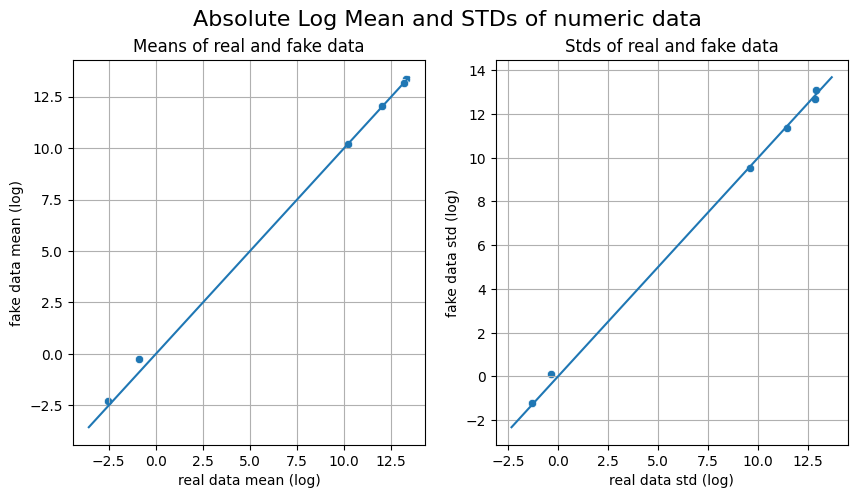

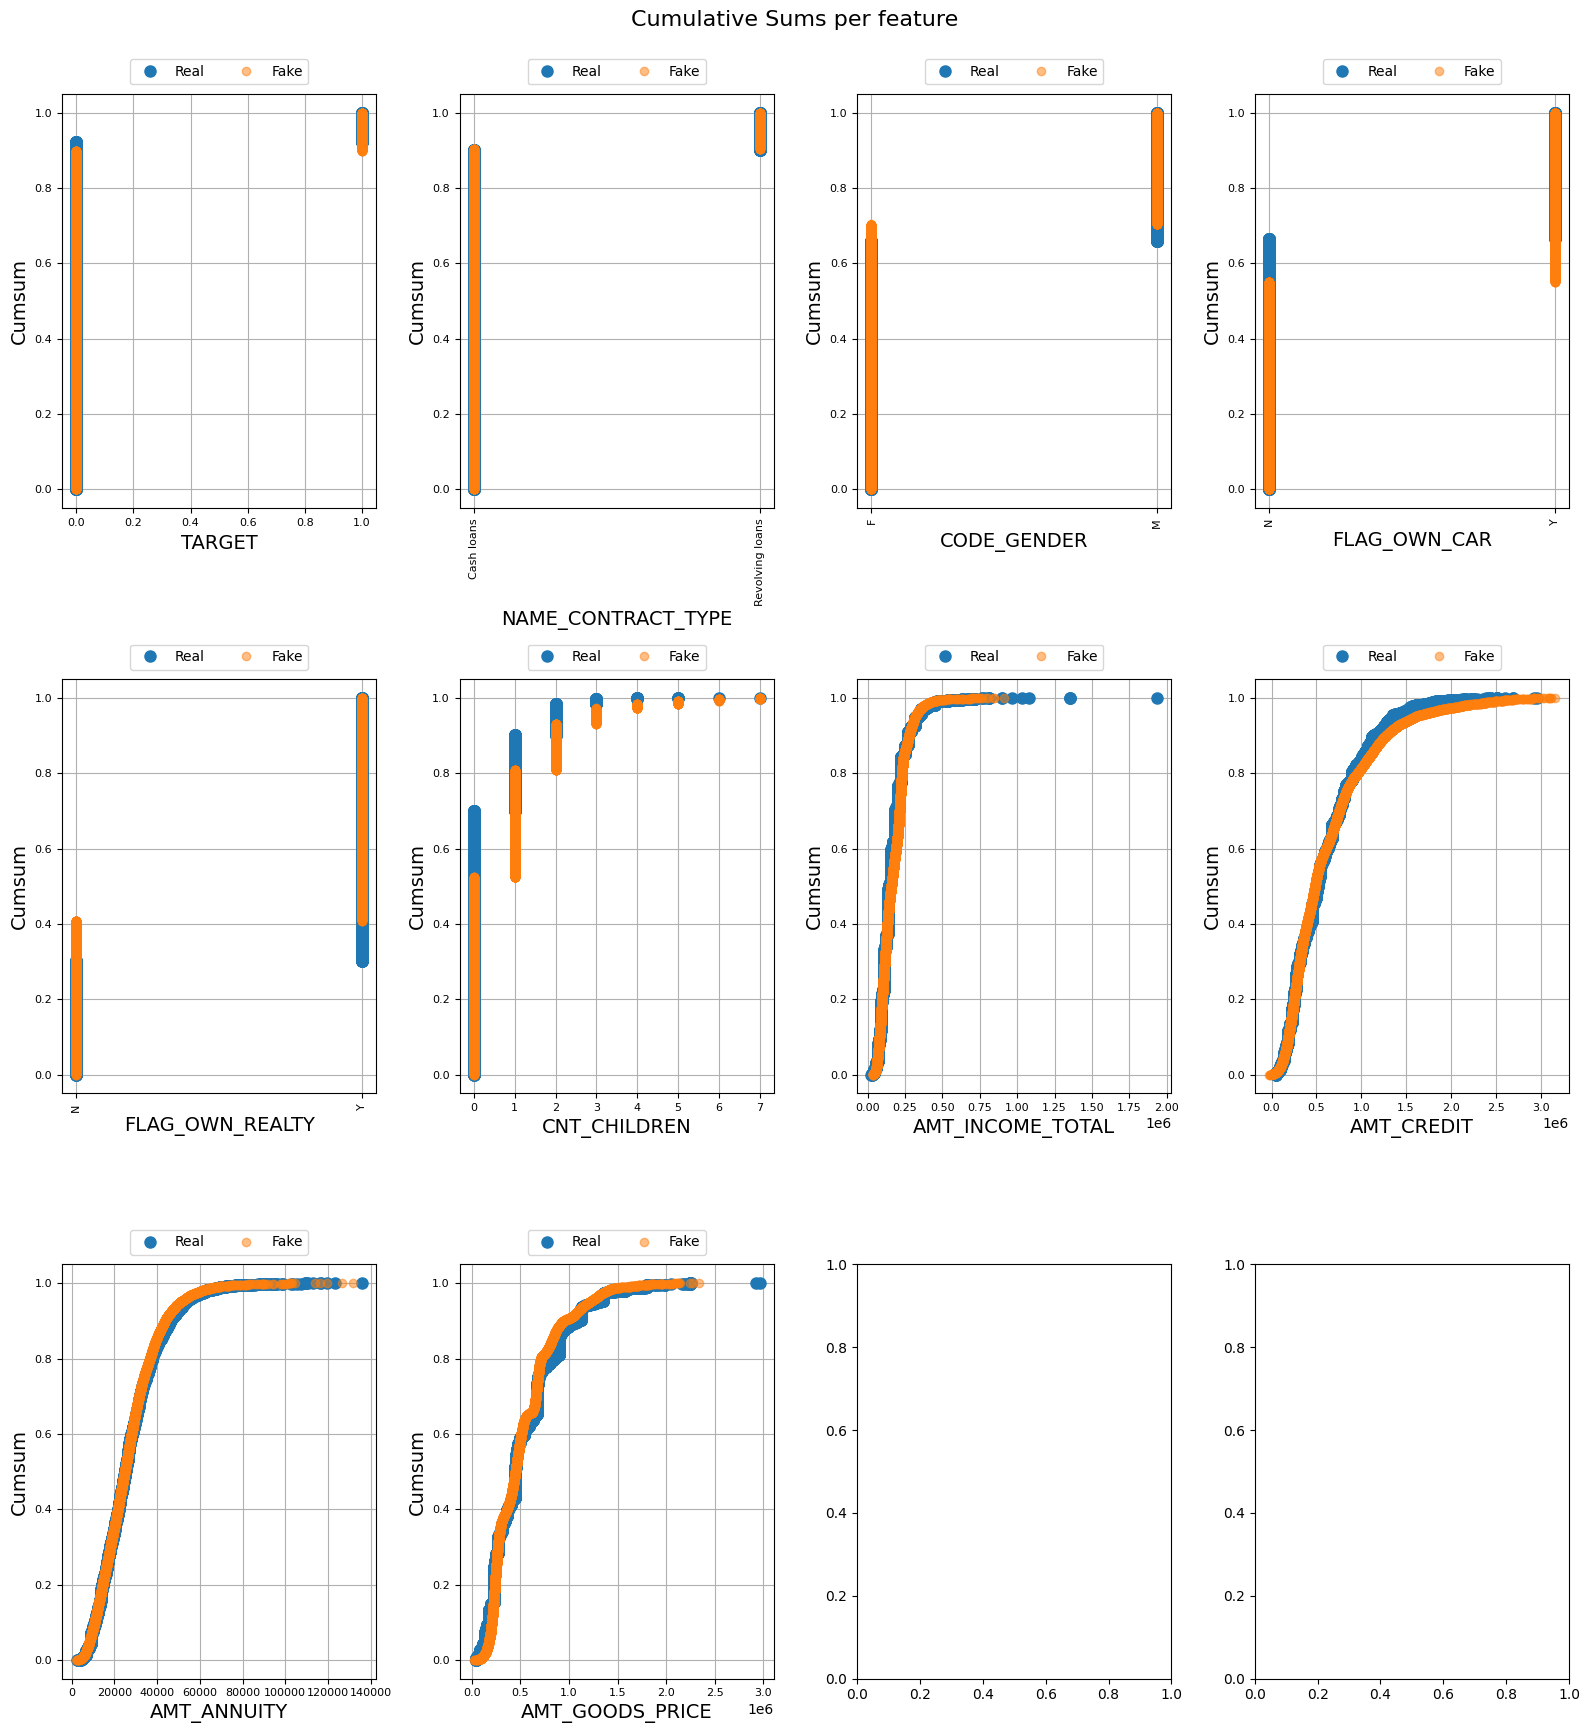

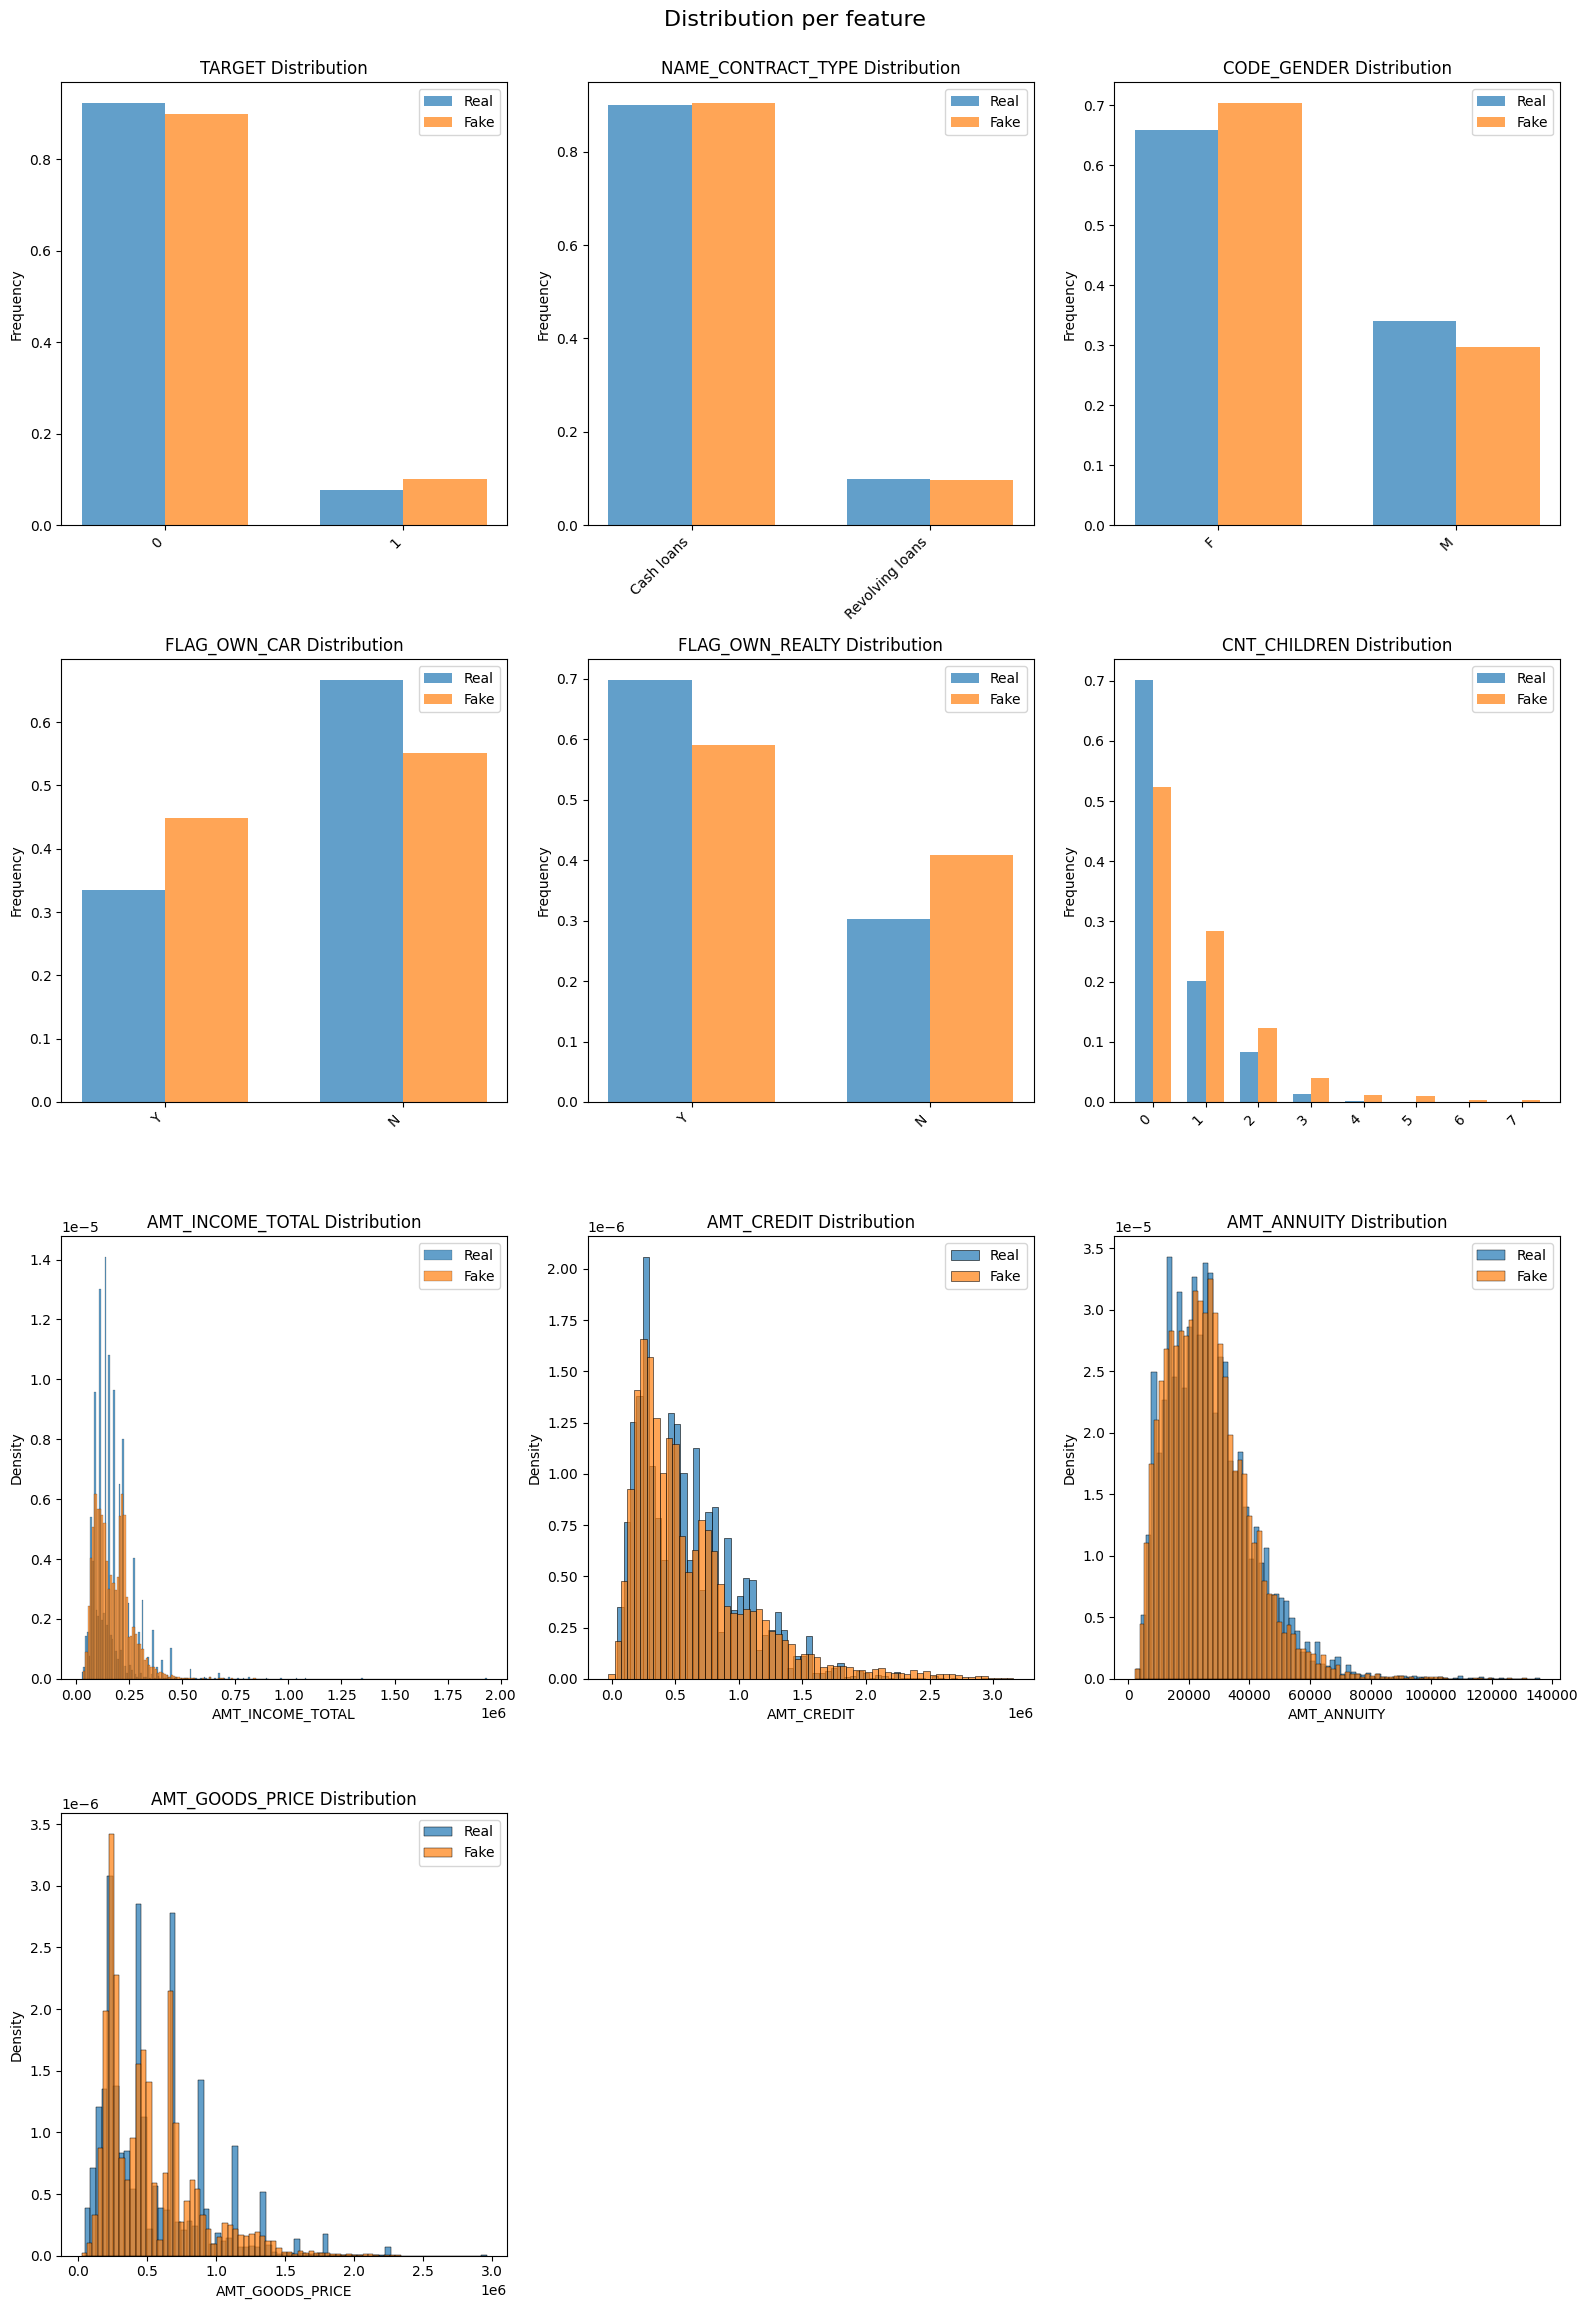

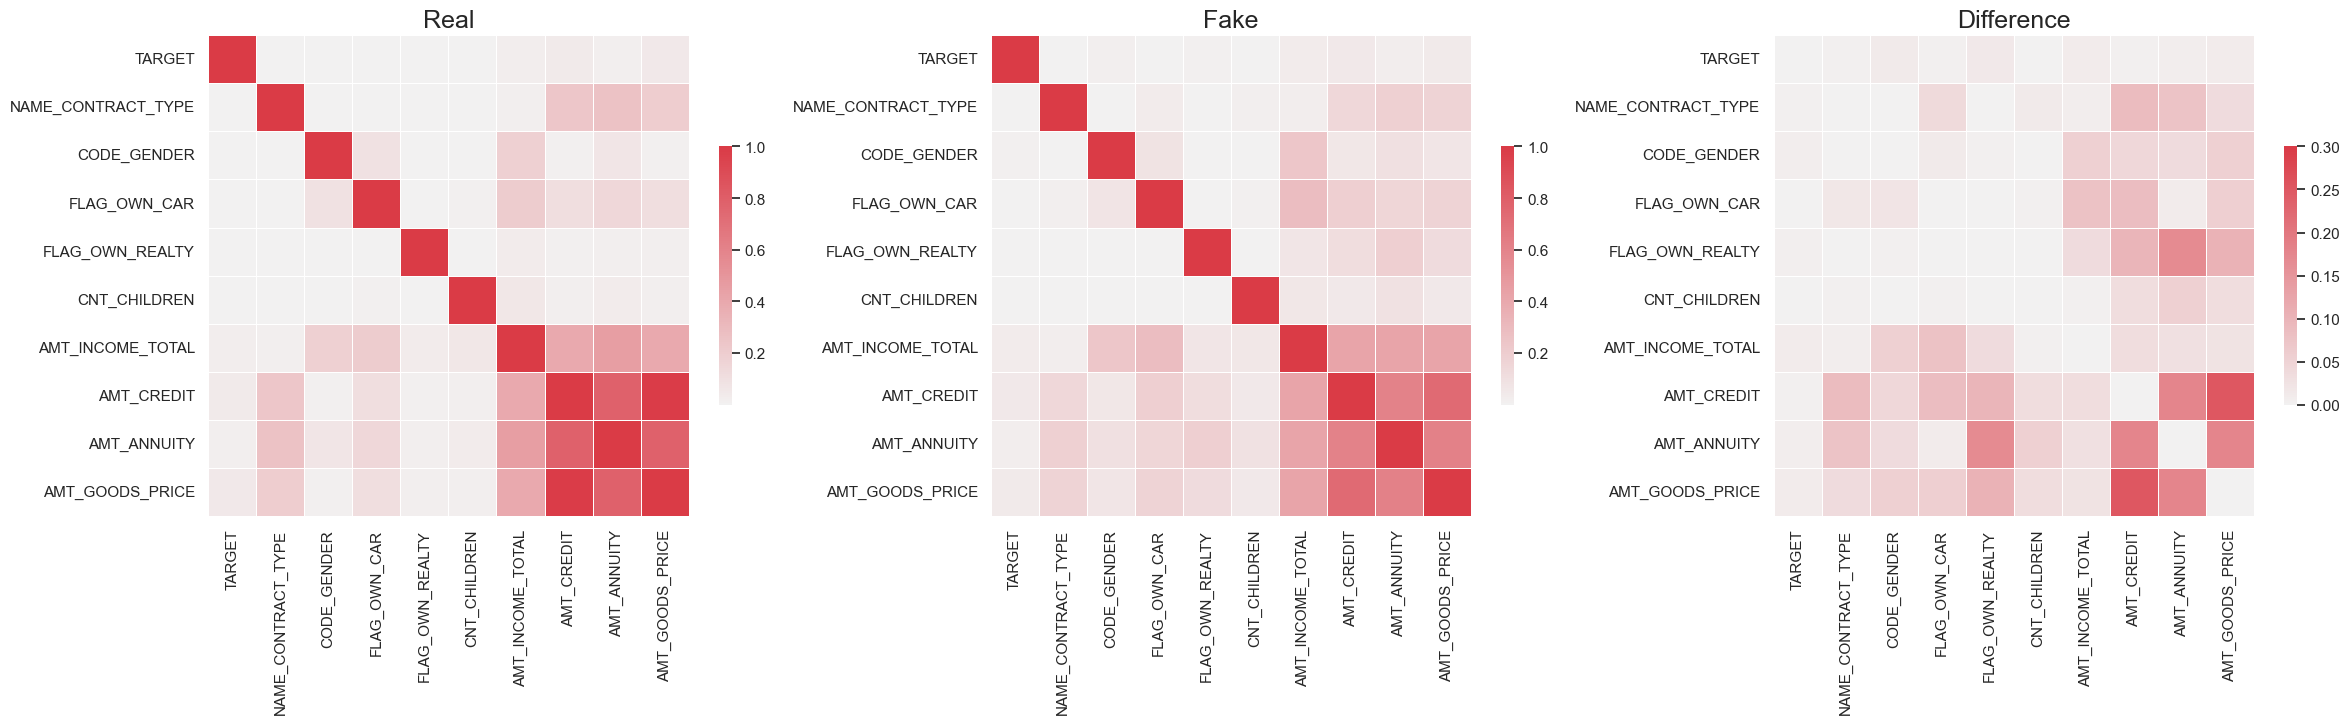

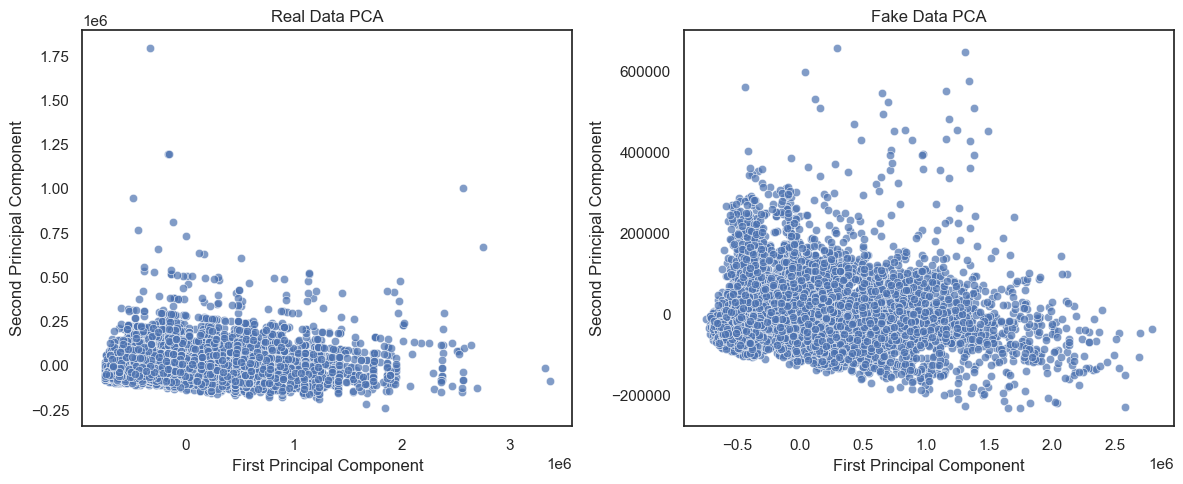

In [10]:
# 使用 TableEvaluator 做可视化评估 
# 注意：TableEvaluator 要求真实数据与合成数据列对齐且列名一致
table_evaluator = TableEvaluator(data, synthetic_data, cat_cols=categorical_features)
table_evaluator.visual_evaluation()  # 生成比较图

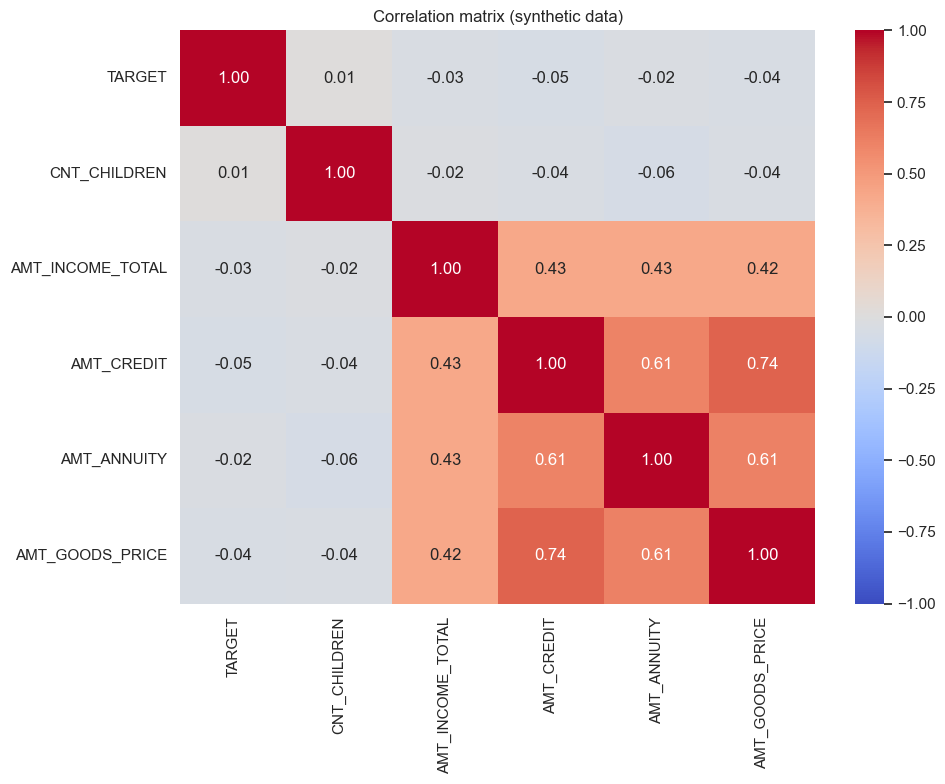

In [11]:
# 画合成数据的相关性热力图
corr = synthetic_data.select_dtypes(include=[np.number]).corr()  # 只对数值列计算
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (synthetic data)")
plt.tight_layout()
plt.show()

In [5]:

import pipreqs
pipreqs . --encoding=utf-8 --force

SyntaxError: invalid syntax (2924285311.py, line 2)